# Project: Forecasting and Predicting the Furniture Sales

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

This dataset consists of daily sales data of various products at a superstore.

We will need to apply Time Series (ARIMA) to build model to predict and forecast the sales of furniture for the next one year i.e. predict future values based on previously observed values. We have a 4-year furniture sales data. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here are the general steps for time series forecasting in Python:

1. Import the necessary libraries, including pandas, numpy, and matplotlib.
Load and preprocess the time series data. This may involve removing missing values, resampling the data to a regular frequency, and transforming the data if needed (e.g., taking the logarithm or differencing the data to remove trend or seasonality).

2. Split the data into training and testing sets. The training set is used to fit the model, while the testing set is used to evaluate its performance.

3. Choose a forecasting model. There are many different models to choose from, including ARIMA, SARIMA, exponential smoothing, and machine learning models such as random forests or neural networks. The choice of model will depend on the characteristics of the time series data and the specific forecasting problem.

4. Fit the chosen model to the training data. This involves estimating the model parameters and selecting the appropriate hyperparameters (e.g., the order of the ARIMA model or the smoothing factor in exponential smoothing).

5. Evaluate the model's performance on the testing data. This may involve computing various metrics such as the mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE).

6. Make forecasts using the trained model. This involves providing the model with input data (e.g., the last few observations of the time series) and using the model to generate forecasts for future time periods.

7. Visualize the forecasts and compare them to the actual data. This can help identify any discrepancies between the model's predictions and the true values, and may suggest areas for further improvement.

Overall, the key to successful time series forecasting is to carefully preprocess the data, choose an appropriate model, and thoroughly evaluate its performance on both training and testing data.

# Data Preparation 

We remove unwanted columns that is not needed and check missing values. Aggregate sales data by date and finally index it with the time series data. 

# Feature Engineering 

We check the stationarity of the data and decide the next step to be taken. Also decompose the data for further clarification and apply the time series model on the data. 

# Model Comparison 
We perform parameter selection to find optimal set of parameters that yields the best performance for the model. 

# Model Selection 
We compare predicted value to the real values and set the forecast from the start to the end of the data.

# **Installing the required packages**

In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

# **Reading the Time Series Data**

In [8]:
#read the dataset
furniture = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/superstore.xls")

In [9]:
#run the 1st 6 rows and all coulmns of the dataset
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
#Checking the dimension of the time series data
furniture.shape

(9994, 21)

In [15]:
#Checking the str/character type variable
furniture.describe(include = 'O')
#  columns with object data types (i.e., categorical columns) in the output.

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [16]:
#Checking the numeric and continuous variable
furniture.describe(include = 'float64')

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896
std,623.245101,0.206452,234.260108
min,0.444000,0.000000,-6599.978000
25%,17.280000,0.000000,1.728750
50%,54.490000,0.200000,8.666500
75%,209.940000,0.200000,29.364000
max,22638.480000,0.800000,8399.976000


In [17]:
#Checking the numeric and integer variable
furniture.describe(include = 'int64')

,Row ID,Postal Code,Quantity
count,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,3.789574
std,2885.163629,32063.693350,2.225110
min,1.000000,1040.000000,1.000000
25%,2499.250000,23223.000000,2.000000
50%,4997.500000,56430.500000,3.000000
75%,7495.750000,90008.000000,5.000000
max,9994.000000,99301.000000,14.000000


In [18]:
#Info command to have a glance on the data types and the missing values
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [19]:
#Check the time spam
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [20]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis = 1, inplace = True)

furniture = furniture.sort_values('Order Date')

#checking null values
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [21]:
furniture.head()

,Order Date,Sales
7980,2014-01-03,16.448
739,2014-01-04,11.784
740,2014-01-04,272.736
741,2014-01-04,3.540
1759,2014-01-05,19.536


In [22]:
furniture = furniture.groupby("Order Date")['Sales'].sum().reset_index()

In [23]:
furniture.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [24]:
#using the pd to_datetime we convert the order of date format so that python treat date as date not object
furniture["Order Date"] = pd.to_datetime(furniture["Order Date"])
furniture.set_index("Order Date", inplace = True)
furniture.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1237, freq=None)

In [25]:
furniture.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158


In [26]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2014-01-03 to 2017-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   1237 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


In [27]:
y = furniture["Sales"].resample('MS').mean() #MS mean Month Start

In [28]:
y['2017']

Order Date
2017-01-01    1911.798870
2017-02-01    1015.056670
2017-03-01    2102.584029
2017-04-01    1352.649485
2017-05-01    1639.300378
2017-06-01    2037.758681
2017-07-01    1560.841931
2017-08-01    2337.810667
2017-09-01    3138.094714
2017-10-01    2777.747257
2017-11-01    3948.260833
2017-12-01    2890.666166
Freq: MS, Name: Sales, dtype: float64

In [29]:
y

Order Date
2014-01-01     647.131591
2014-02-01     225.994600
2014-03-01    2320.458708
2014-04-01    1178.972708
2014-05-01     844.581679
2014-06-01    1383.805104
2014-07-01    1414.433042
2014-08-01    1162.894521
2014-09-01    2920.619671
2014-10-01    1084.599759
2014-11-01    2711.335059
2014-12-01    2483.772161
2015-01-01    1009.670867
2015-02-01     703.024176
2015-03-01    1489.471231
2015-04-01    1367.808340
2015-05-01    1115.988389
2015-06-01    1127.149636
2015-07-01    1198.555208
2015-08-01    1677.196918
2015-09-01    2583.836720
2015-10-01    1207.881673
2015-11-01    2713.305839
2015-12-01    2497.317373
2016-01-01     882.975762
2016-02-01     957.450625
2016-03-01    1846.995536
2016-04-01    1490.386115
2016-05-01    1965.094069
2016-06-01    1494.242000
2016-07-01    1570.478520
2016-08-01    1111.263368
2016-09-01    2621.786604
2016-10-01    2210.657222
2016-11-01    2738.343648
2016-12-01    3464.251536
2017-01-01    1911.798870
2017-02-01    1015.056670
2

# **Visually checking the time series for trend and other components**

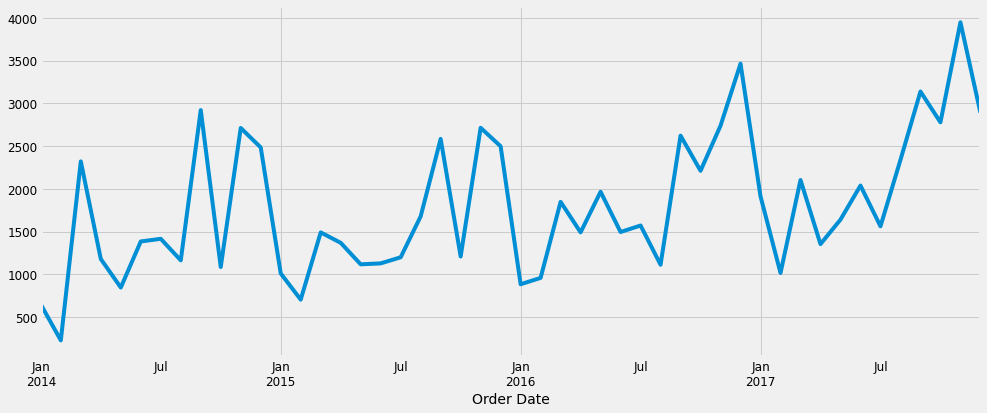

In [30]:
y.plot(figsize=(15,6))
plt.show()

**The plot clearly indicates that the time series has seasonality pattern. The sales are always low at
the beginning of the year and high at the end of the year. There is always an upward trend within
any single year with a couple of low months in the mid of the year**.

# **Checking Stationarity**

**our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. 
Augmented Dickey-Fuller(ADF) statistic is one of the more widely used statistic test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.**

**The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary(has some time-dependent structure). The alternate hypothesis(rejecting the null hypothesis) is that the time series is stationary.**

# **Performing the Dicky Fuller Test**

In [31]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)

print("ADF Statistic: %f" % result[0]) #%f means float 
      
print('P-value: %f' % result[1])  
      
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) #%.3f means float with 3 decimal point

ADF Statistic: -4.756843
P-value: 0.000066
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


**This suggest that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low propability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.**

**The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggest the time series does not have a unit root, meaning it is stationary.**

In [56]:
from statsmodels.tsa.stattools import adfuller

# Calculate the ADF test statistic and p-value
result = adfuller(y)
print('ADF test statistic: ', result[0])
print('p-value: ', result[1])

# Check if the time series is stationary based on the p-value
if result[1] < 0.05:
    print('The time series is stationary')
else:
    print('The time series is not stationary')

ADF test statistic:  -4.756842628201399
p-value:  6.5724510764319e-05
The time series is stationary


# **Decomposing**

**Decomposing the time series into three distinct components: trend, seasonality,and noise**

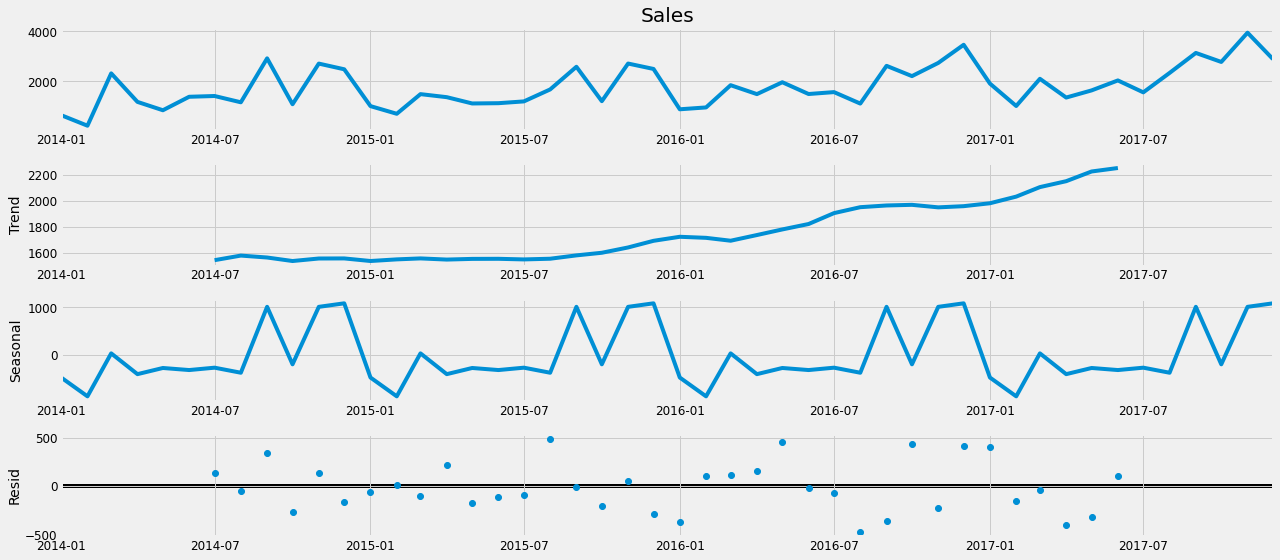

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

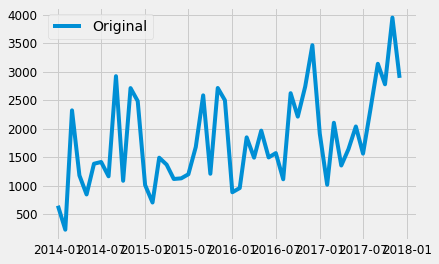

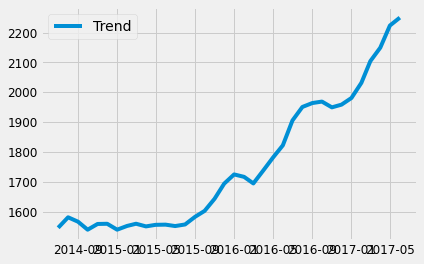

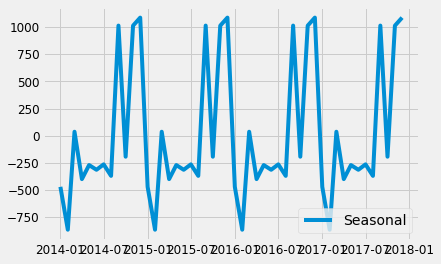

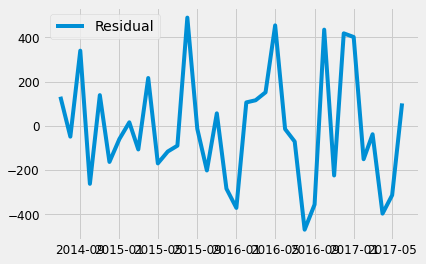

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')


trend  = decomposition.trend
plt.show()
plt.plot(trend, label = "Trend")
plt.legend(loc  = "best")

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

**By visualizing the decomposition components of the original time series we can say that the sales of furniture is unstable, along with its ARIMA(p,d,q)**

ACF,PACF

The ACF (Auto-Correlation Function) and PACF (Partial Auto-Correlation Function) plots are used to identify the order of an ARIMA model. 

ACF plot: The ACF plot shows the correlation between the time series and its lagged values. The lag is the number of time periods between the current value and the lagged value. The ACF plot can help identify the order of the moving average (MA) component of the ARIMA model. If the ACF plot shows a sharp drop after a certain lag, it suggests that the MA component should include that lag as a parameter.

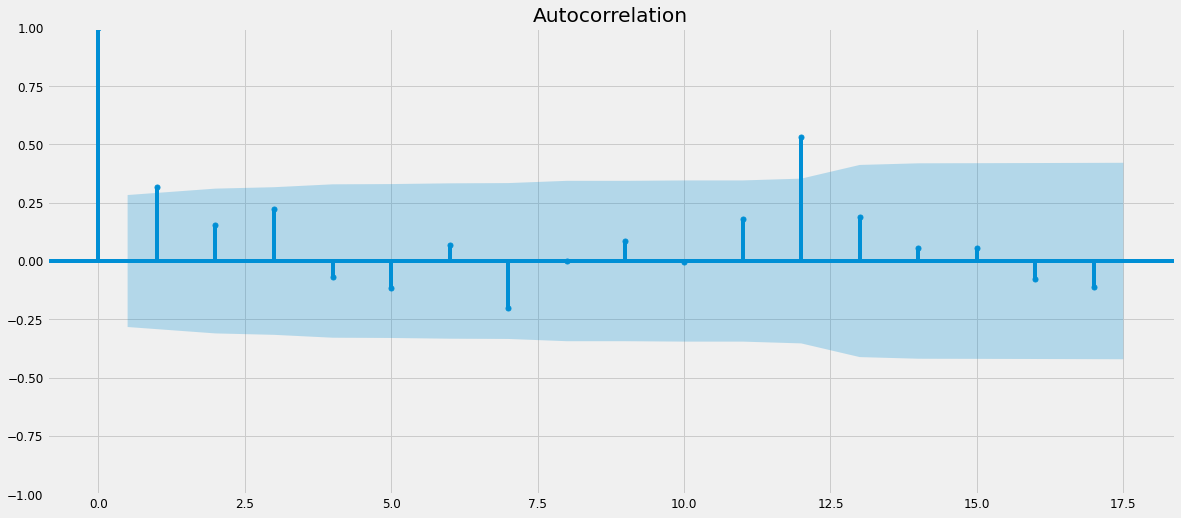

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(y)
plt.show()


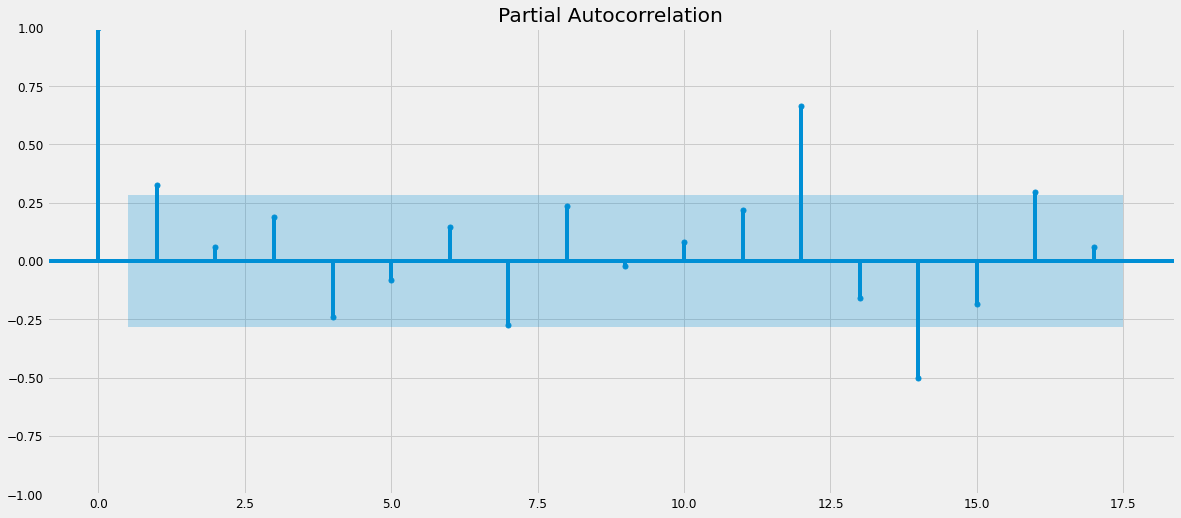

In [48]:
# PACF plot: The PACF plot shows the correlation between the time series and its lagged values, after removing the influence of the intermediate lags. The PACF plot can help identify the order of the autoregressive (AR) component of the ARIMA model. If the PACF plot shows a sharp drop after a certain lag, it suggests that the AR component should include that lag as a parameter.
plot_pacf(y)
plt.show()

# Forecasting using the best AR I MA(p,d,q) and Seasonality's(P,D,Q)


**Time Series Forecasting using ARIMA. We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q)**

In [33]:
p = d = q  = range(0, 2) 
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(X[0], X[1], X[2], 12) for X in list(itertools.product(p, d, q))]
print('Examples of paramter combination for Seasonal ARIMA....')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of paramter combination for Seasonal ARIMA....
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
from pylab import rcParams #Param means Parameter
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False,
enforce_invertibility= False)
            results = mod.fit()
            print('ARIMA{}x{}12- AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12- AIC:849.2964734613763
ARIMA(0, 0, 0)x(0, 0, 1, 12)12- AIC:1777.06051156471
ARIMA(0, 0, 0)x(0, 1, 0, 12)12- AIC:542.5524077991603
ARIMA(0, 0, 0)x(0, 1, 1, 12)12- AIC:364.82273932500243
ARIMA(0, 0, 0)x(1, 0, 0, 12)12- AIC:556.4030539681389
ARIMA(0, 0, 0)x(1, 0, 1, 12)12- AIC:1606.4587396826146
ARIMA(0, 0, 0)x(1, 1, 0, 12)12- AIC:379.31311116746053
ARIMA(0, 0, 0)x(1, 1, 1, 12)12- AIC:365.93920356274947
ARIMA(0, 0, 1)x(0, 0, 0, 12)12- AIC:800.9546615001049
ARIMA(0, 0, 1)x(0, 0, 1, 12)12- AIC:2788.6075083797364
ARIMA(0, 0, 1)x(0, 1, 0, 12)12- AIC:528.8097917495888
ARIMA(0, 0, 1)x(0, 1, 1, 12)12- AIC:349.6147790742557
ARIMA(0, 0, 1)x(1, 0, 0, 12)12- AIC:558.3100438690639
ARIMA(0, 0, 1)x(1, 0, 1, 12)12- AIC:2638.898231229004
ARIMA(0, 0, 1)x(1, 1, 0, 12)12- AIC:378.6443983832915
ARIMA(0, 0, 1)x(1, 1, 1, 12)12- AIC:350.75218248803566
ARIMA(0, 1, 0)x(0, 0, 0, 12)12- AIC:761.9496656386243
ARIMA(0, 1, 0)x(0, 0, 1, 12)12- AIC:1381.302285815633
ARIMA(0, 1, 0)x(0, 1, 0

In [40]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                # enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0518      0.311     -0.167      0.868      -0.661       0.557
ma.L1         -0.8675      0.179     -4.840      0.000      -1.219      -0.516
ar.S.L12      -0.5527      0.160     -3.450      0.001      -0.867      -0.239
sigma2      1.866e+05   5.34e+04      3.493      0.000    8.19e+04    2.91e+05


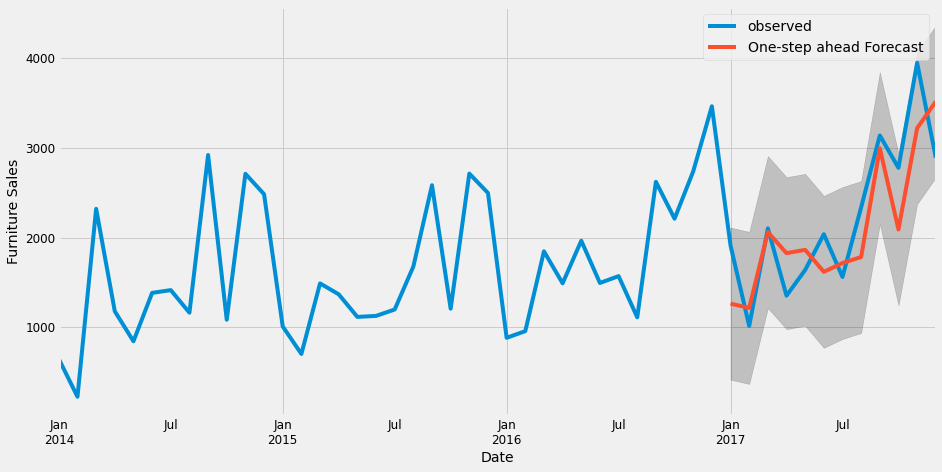

In [50]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',alpha=1, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [51]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 470.77


**In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors - that is, the average squared difference between the estimated value and what is estimated. The MSE is a measure of the quality of an estimator - it is always non - negative, and the smaller the MSE, the closer we are to finding the line of best fit.**


**Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furnituredaily sales range from around 400 to over 1200. In my opinion, this is a pritty good model so far. Mean Absolute Percentage Error and Mean absolute Deviation we can also check instead of RMSE.**

            lower Sales  upper Sales
2018-01-01  1065.488326  2758.722240
2018-02-01   671.272119  2369.997291
2018-03-01  1644.087006  3356.654059
2018-04-01  1104.855897  2830.631762
2018-05-01  1488.883615  3227.794577
2018-06-01  1400.352318  3152.298531
2018-07-01  1222.696354  2987.581613
2018-08-01  1309.998267  3087.728396
2018-09-01  2496.458342  4286.941195
2018-10-01  2101.712221  3904.857606
2018-11-01  2910.645230  4726.364844
2018-12-01  2832.556562  4660.763921
2019-01-01  1415.912037  3485.901549


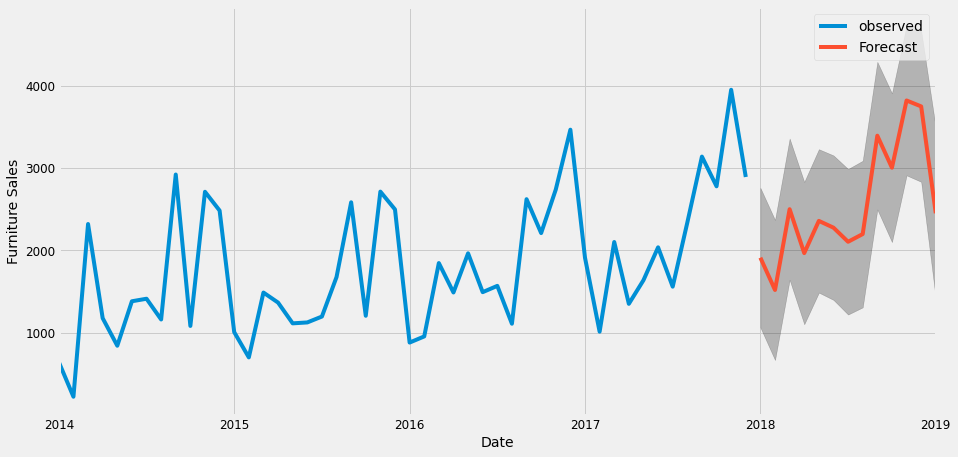

In [52]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

# Diagnostics

1. Errors follows normality
2. Errors should not have auto correlation (ACF, no spikes beyond the limits)
3. Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly)

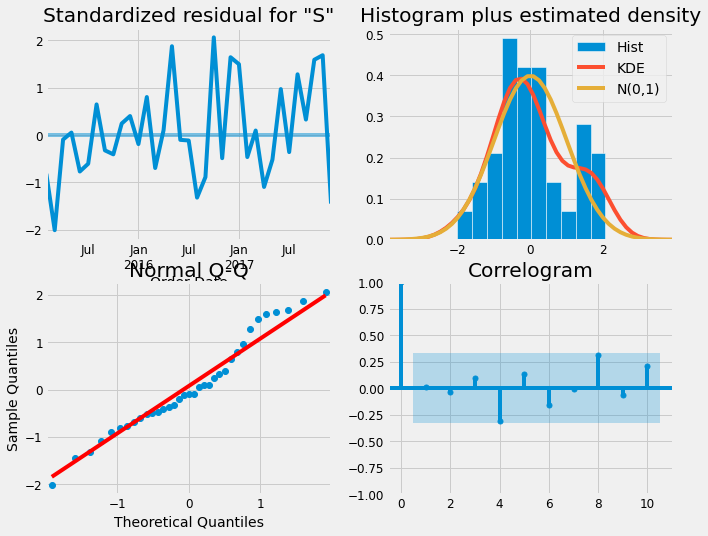

In [53]:
results.plot_diagnostics(figsize=(10,8))
plt.show()

The KDE plot of the residuals on the top right is almost similar with the normal distribution.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

In [ ]:
# train_data = sales_data.iloc[:-24]
# test_data = sales_data.iloc[-24:]


In [58]:
# forecast = results.forecast(steps=24)

# # Plot the forecasts and the actual sales data
# plt.figure(figsize=(15,8))
# plt.plot(train_data, label='Training Data')
# plt.plot(test_data, label='Testing Data')
# plt.plot(forecast, label='Forecast')
# plt.title('Sales Forecasting with SARIMA')
# plt.xlabel('Year')
# plt.ylabel('Log(Sales)')
# plt.legend()
# plt.show()


In [57]:
# print(forecast)